# Car_Price_Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

importing the neccesary libraries needed for the task

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
dataset=pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checkingthe shape of the dataset
dataset.shape

(301, 9)

In [5]:
#showing information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#describing the dataset
dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Cleaning

In [7]:
##check missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking the tital duplicates
dataset.duplicated().sum()

2

In [9]:
#here we found 2 duplicates  
dataset.drop_duplicates(inplace=True)

In [10]:
#Cheching CarNames and how many are there
dataset['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

There are 98 different Types of cars and with Different Quantity

In [11]:
# fueltype - Car fuel type i.e gas or diesel
dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

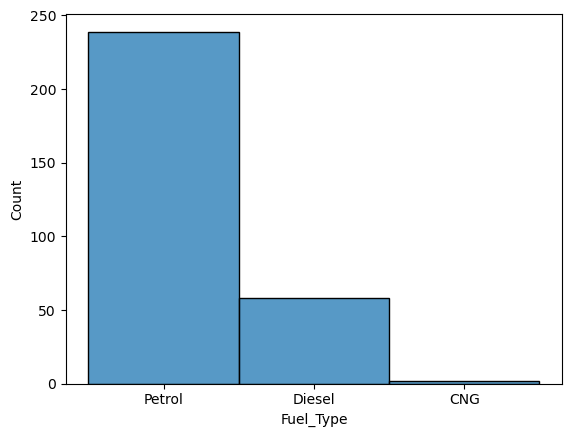

In [12]:
sns.histplot(dataset['Fuel_Type'])
plt.show()

In [13]:
#checking the year of manufactures of car
dataset['Year'].value_counts()

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

The cars from 2004 to 2015 

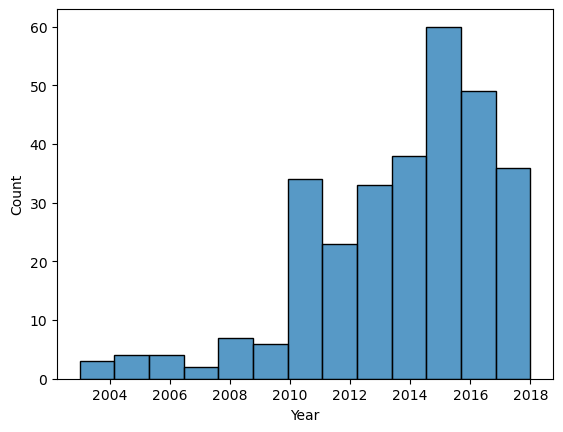

In [14]:
sns.histplot(dataset['Year'])
plt.show()

In [15]:
#checking the Transmission of the car
dataset['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [16]:
#checking the selling type and the count for that
dataset['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [17]:
#checking the age of the car
dataset['current_year']=2024
dataset['Age_of_the_car']=dataset['current_year']-dataset['Year']
dataset.drop(['current_year'],axis=1,inplace=True)
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age_of_the_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


### Data Encoding

In [18]:
#here we are removing the Car_name for the Encoding the numerical data
data=dataset.drop("Car_Name",axis=1)
data=pd.get_dummies(data=data,drop_first=True)
data

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,10,False,True,False,True
1,2013,4.75,9.54,43000,0,11,True,False,False,True
2,2017,7.25,9.85,6900,0,7,False,True,False,True
3,2011,2.85,4.15,5200,0,13,False,True,False,True
4,2014,4.60,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,8,True,False,False,True
297,2015,4.00,5.90,60000,0,9,False,True,False,True
298,2009,3.35,11.00,87934,0,15,False,True,False,True
299,2017,11.50,12.50,9000,0,7,True,False,False,True


In [19]:
data1=['Fuel_Type_Diesel','Fuel_Type_Petrol','Selling_type_Individual','Transmission_Manual']
data[data1]=data[data1].astype('int')
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,10,0,1,0,1
1,2013,4.75,9.54,43000,0,11,1,0,0,1
2,2017,7.25,9.85,6900,0,7,0,1,0,1
3,2011,2.85,4.15,5200,0,13,0,1,0,1
4,2014,4.60,6.87,42450,0,10,1,0,0,1


In [137]:
data.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639,-1.000000,0.056469,-0.052197,-0.036820,0.003434
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948,0.053167,0.464934,-0.456829,-0.511779,-0.334326
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Age_of_the_car,-1.000000,-0.234369,0.053167,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.056469,0.543541,0.464934,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.052197,-0.531636,-0.456829,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Selling_type_Individual,-0.036820,-0.553851,-0.511779,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,0.003434,-0.348869,-0.334326,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


## Data Analysis

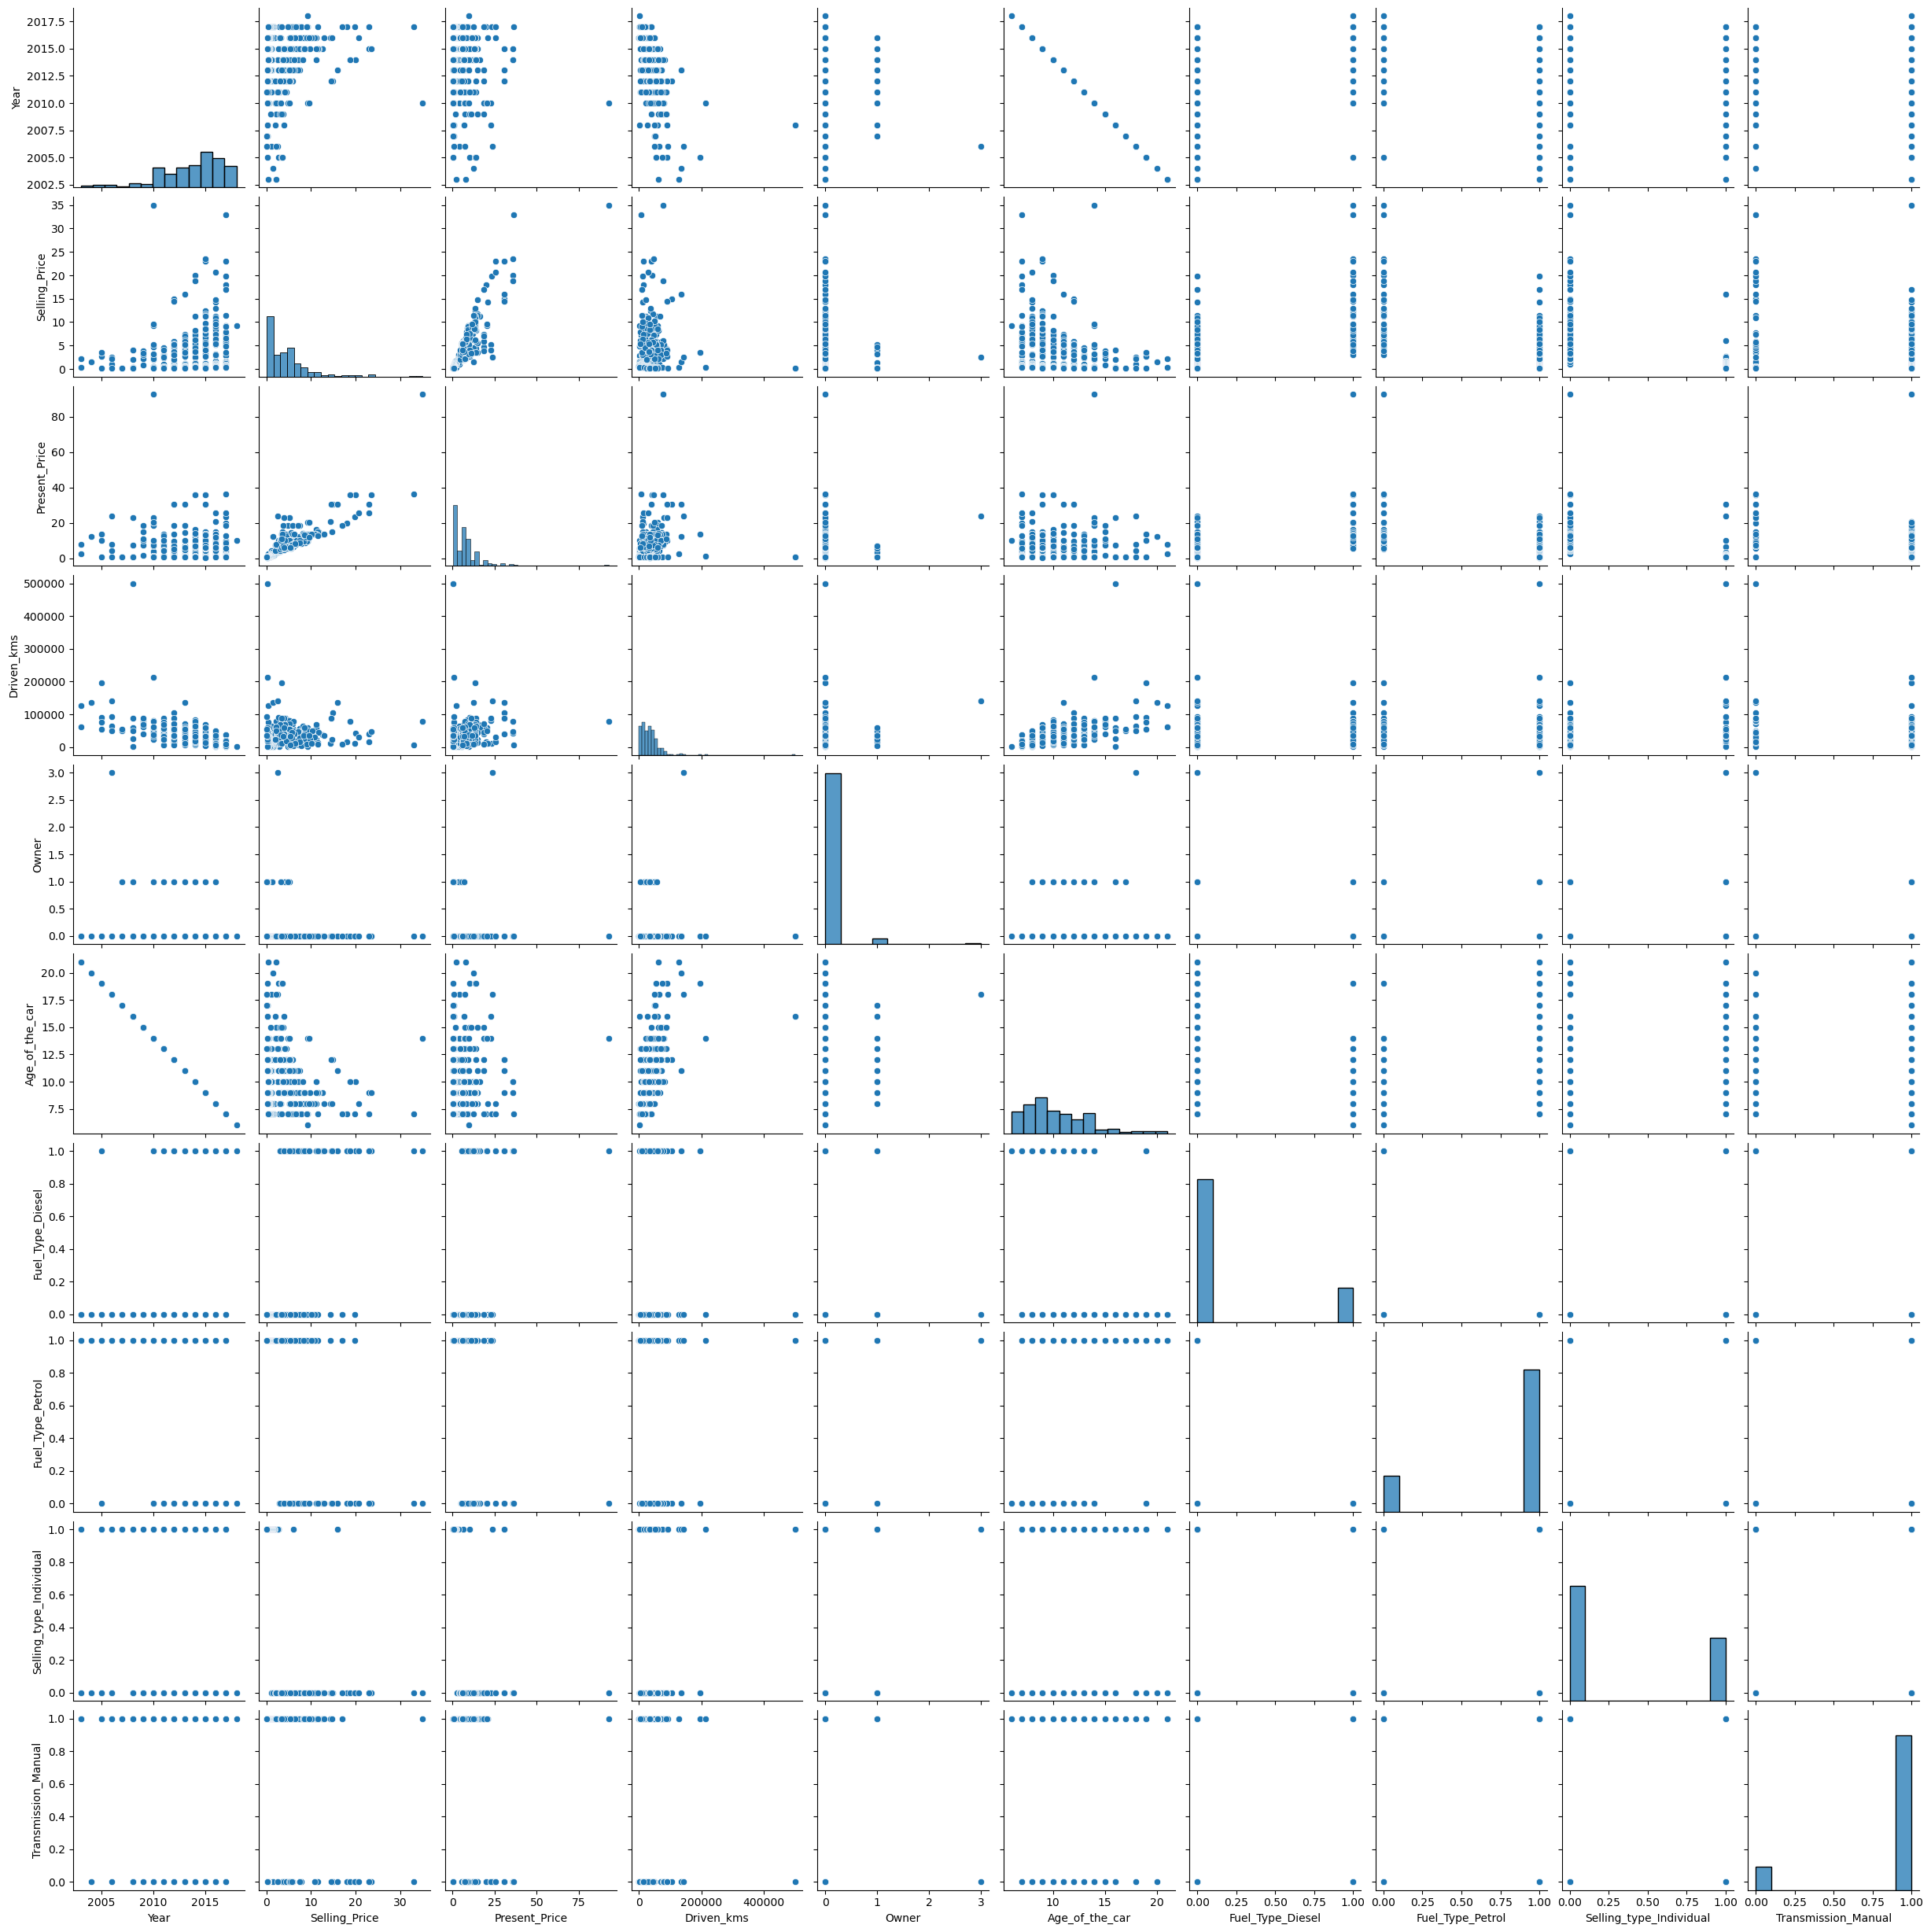

In [20]:
sns.pairplot(data)

<function matplotlib.pyplot.show(close=None, block=None)>

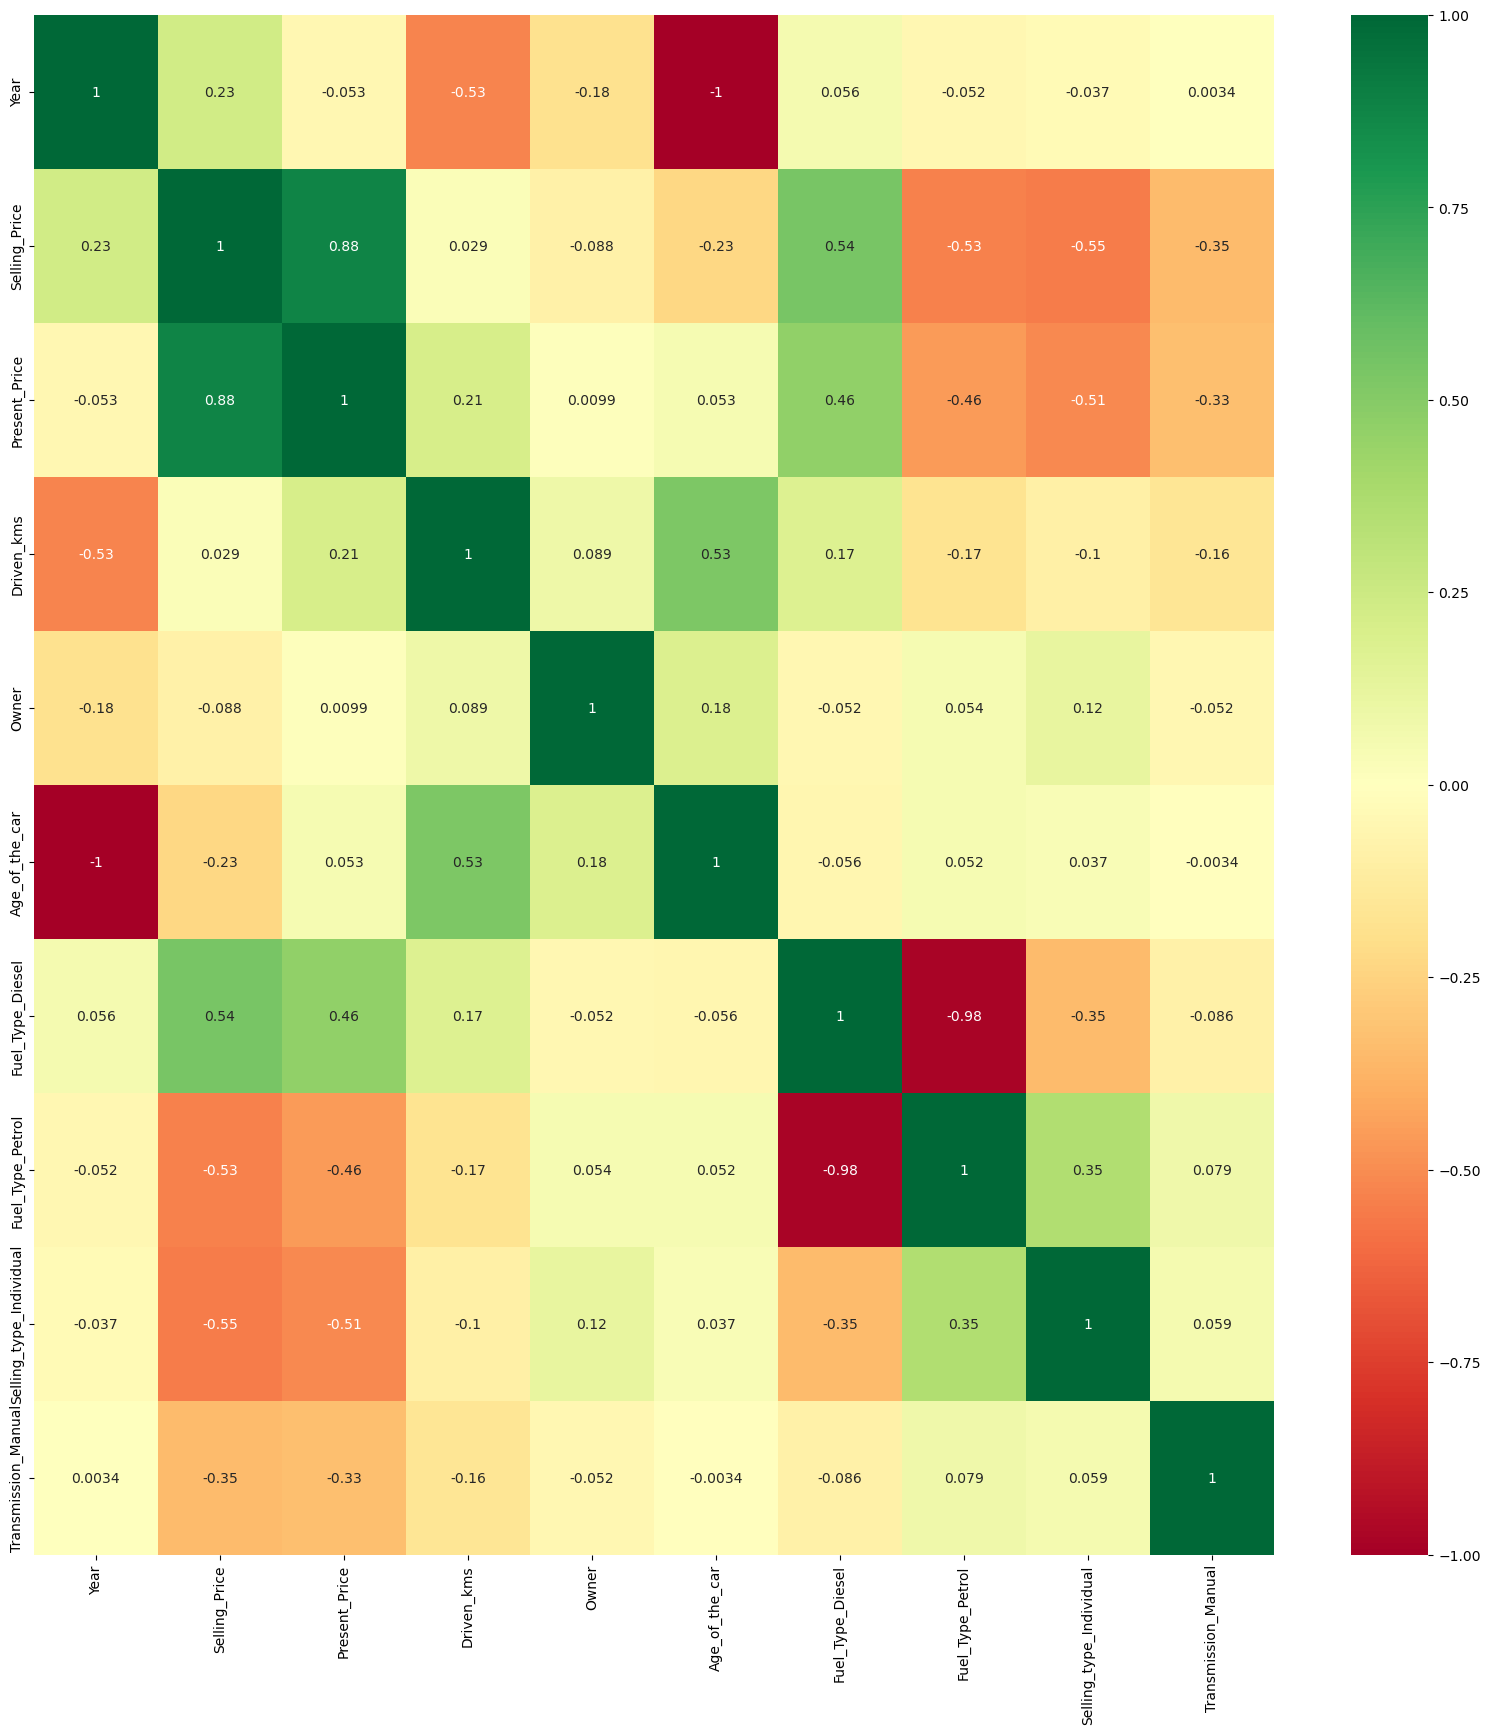

In [21]:

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show

<Axes: ylabel='Density'>

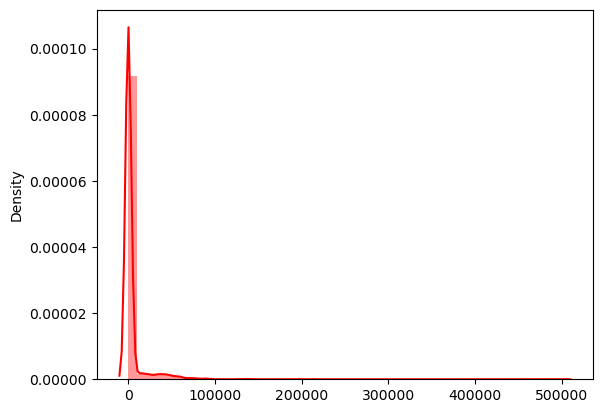

In [22]:
sns.distplot(data,color="red")

In [23]:
### Splitting the data into target and features
target=data[['Selling_Price']]
target

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [24]:
features=data.drop(columns=['Selling_Price'])
features

,Year,Present_Price,Driven_kms,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,10,0,1,0,1
1,2013,9.54,43000,0,11,1,0,0,1
2,2017,9.85,6900,0,7,0,1,0,1
3,2011,4.15,5200,0,13,0,1,0,1
4,2014,6.87,42450,0,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,8,1,0,0,1
297,2015,5.90,60000,0,9,0,1,0,1
298,2009,11.00,87934,0,15,0,1,0,1
299,2017,12.50,9000,0,7,1,0,0,1


## Building the Modeling uaing linear regression

In [25]:
#separated x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [26]:
#Showig the shaes of the x_train,x_test,y_train,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(224, 9)
(224, 1)
(75, 9)
(75, 1)


In [27]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=lin.predict(x_test)
y_pred

array([[  7.3922551 ],
       [  1.4328575 ],
       [  9.09754902],
       [  2.4760583 ],
       [  9.88872908],
       [  0.88734484],
       [  1.98148621],
       [  4.21334719],
       [  1.58659578],
       [  5.47512258],
       [  1.28800369],
       [  7.6499531 ],
       [  5.41343275],
       [  6.21526264],
       [ -0.59003708],
       [  3.42757013],
       [  7.74872583],
       [  4.81622992],
       [  4.93724235],
       [  3.42697321],
       [  4.19337536],
       [  4.81406399],
       [  0.13311324],
       [  4.16604063],
       [ 10.15123067],
       [ -0.91366189],
       [  0.5600664 ],
       [ 10.11496087],
       [  1.46985651],
       [  0.46858732],
       [  6.44309744],
       [  4.42728139],
       [  8.72507647],
       [  5.92510396],
       [  6.88547313],
       [  0.762423  ],
       [  4.11318264],
       [  1.7729115 ],
       [ -0.06001466],
       [  2.65076771],
       [  6.68340381],
       [  6.56378157],
       [  7.89026153],
       [  2

These are the y predicted values

Text(0, 0.5, 'y_pred')

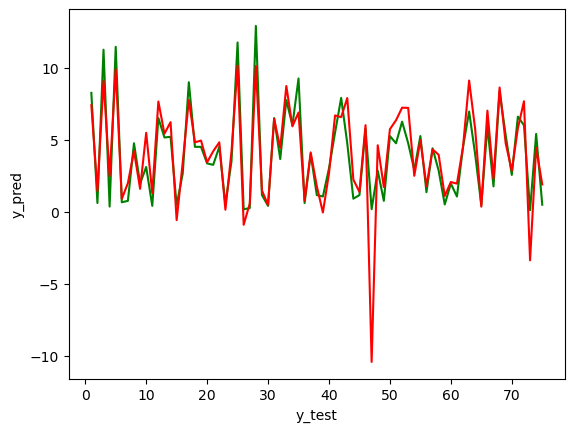

In [29]:
#Visualizing the predicted and Acutual values using line plot
x=[i for i in range(1,76,1)]
plt.plot(x,y_test,color='green')
plt.plot(x,y_pred,color='Red')
plt.xlabel('y_test')
plt.ylabel('y_pred')

<Axes: ylabel='Density'>

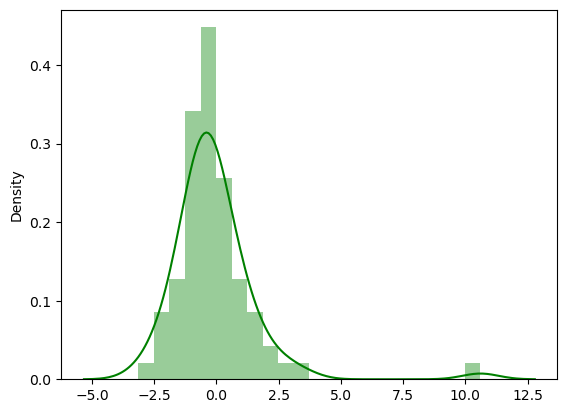

In [30]:
sns.distplot(y_test-y_pred,color="green")

Text(0, 0.5, 'y_pred')

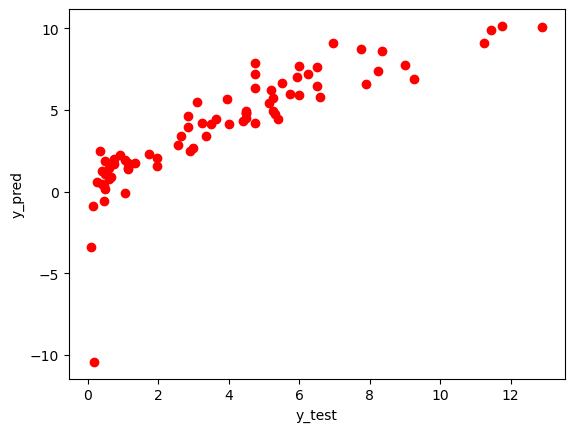

In [31]:
#ploting using the scatter plot
plt.scatter(y_test,y_pred,color="Red")
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Evaluation

In [32]:
#Rsquare score
Rsqu=lin.score(x_test,y_test)
Rsqu

0.6951346327484809

In [33]:
#finding the relation betweem SSE,SST,MAE,MSEand Rsquare
#Rsquare is the model score
SSE=((y_test-y_pred)**2).sum()
SST=((y_test-y_test.mean())**2).sum()
print("SSE=",SSE)
print("SST=",SST)
print("Rsquared=",Rsqu)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))

SSE= Selling_Price    221.691347
dtype: float64
SST= Selling_Price    727.177867
dtype: float64
Rsquared= 0.6951346327484809
MAE: 1.0637881209474351
MSE: 2.955884631713461


The Selling price of the Car depends on the Age of the car,Present car price,Kilometers travelled,trasmission,fuel type,Body of the car.